<a href="https://colab.research.google.com/github/AlexanderPodgornov/AVL/blob/master/%D0%A6%D0%B5%D0%BD%D0%B0%D0%96%D0%B8%D0%BB%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%%capture
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx

In [6]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')
print(training_data)
print(training_data.shape)

       Целевая.Цена  Спальни  Ванные  Жилая площадь  Общая площадь  \
0            830000        5    3.50           3490          21780   
1            385000        4    1.75           2360           7620   
2            610000        6    2.75           2040           8560   
3            550000        3    1.75           1940           8376   
4           1300000        3    2.75           3450           5350   
...             ...      ...     ...            ...            ...   
15124        930000        4    4.25           5710          24663   
15125        400000        3    1.50           1950           4473   
15126       1580000        3    2.00           3620          14250   
15127        339900        4    2.50           2340           9748   
15128        430000        3    1.50           1450           7316   

       Количество этажей  Вид на воду  Просмотрены ранее  Состояние  \
0                    2.0            0                  0          3   
1                

In [7]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

In [9]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor()
print(linear_regression_model, random_forest_model)

LinearRegression() RandomForestRegressor()


In [12]:
training_values = training_data['Целевая.Цена']
training_points = training_data.drop('Целевая.Цена', axis=1)
linear_regression_model.fit(training_points, training_values)
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [26]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')
print(test_data)
print(test_data.info())
test_points = test_data.drop('Целевая.Цена', axis=1)
test_values = test_data['Целевая.Цена']

      Целевая.Цена  Спальни  Ванные  Жилая площадь  Общая площадь  \
0           260000        3    1.00           1300          10139   
1           734500        4    2.75           3280           6845   
2           325000        1    1.00           1220          12426   
3          1990000        3    2.50           2880          13500   
4           315000        3    2.00           1300           3731   
...            ...      ...     ...            ...            ...   
6479        600000        5    3.25           4410          58157   
6480        435000        3    1.00           1400           4800   
6481       1500000        3    3.50           3530           3610   
6482        304999        4    2.25           2270           9600   
6483       1190000        3    2.25           2390           7875   

      Количество этажей  Вид на воду  Просмотрены ранее  Состояние  \
0                   1.0            0                  0          3   
1                   2.0        

In [22]:
test_prediction_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)
print(test_prediction_linear, test_predictions_random_forest)

[ 204625.96379636  984565.47896385  439655.97865858 ... 1050229.96204196
  306498.76438015  983824.90091828] [ 211099.09833333  860496.48        385289.9        ... 1296041.54
  302462.99       1053820.5       ]


In [23]:
%matplotlib inline

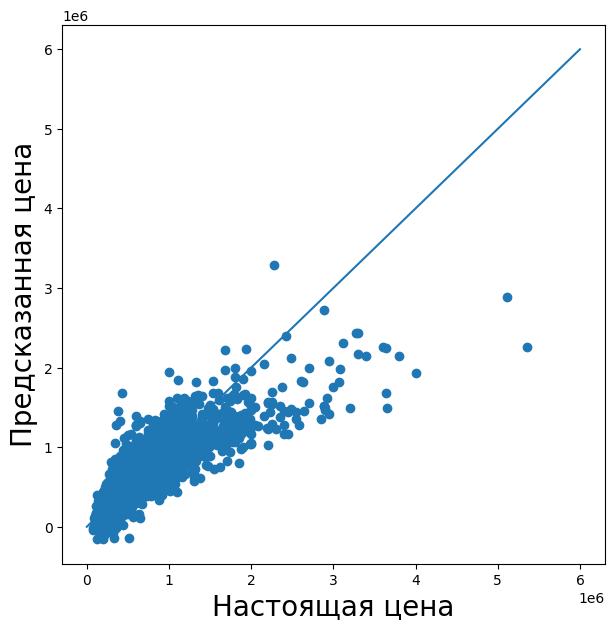

In [27]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_prediction_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

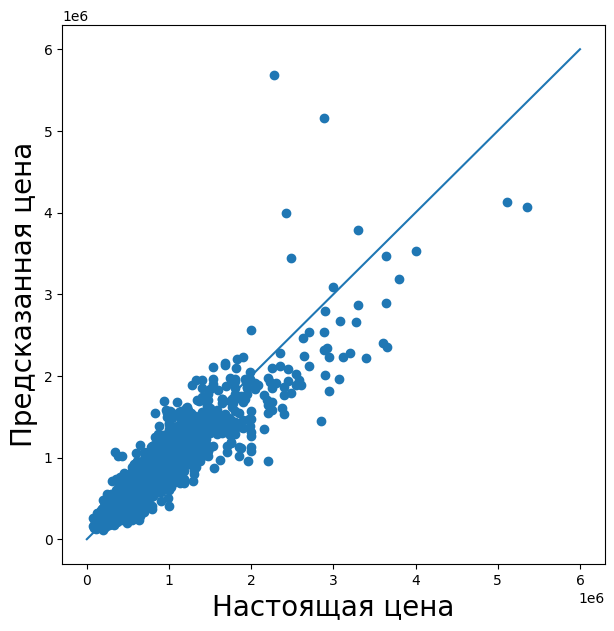

In [28]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error_linear_model = mean_absolute_error(test_values, test_prediction_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_prediction_linear)

mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

In [40]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(mean_absolute_error_linear_model, np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(mean_absolute_error_random_forest_model,mean_squared_error_random_forest_model**(1/2)))

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
MAE: 70930.47, RMSE: 135593.63 для модели случайного леса


In [41]:
random_forest_model.feature_importances_

array([0.00450395, 0.01034734, 0.32377444, 0.02626732, 0.00268952,
       0.02784188, 0.0157043 , 0.00407607, 0.27552325, 0.02498094,
       0.00719102, 0.03066347, 0.00255908, 0.17218888, 0.07168854])

In [43]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
print(feature_importance)

Empty DataFrame
Columns: [Название признака, Важность признака]
Index: []


In [44]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

In [45]:
feature_importance

,Название признака,Важность признака
0,Спальни,0.004504
1,Ванные,0.010347
2,Жилая площадь,0.323774
3,Общая площадь,0.026267
4,Количество этажей,0.002690
5,Вид на воду,0.027842
6,Просмотрены ранее,0.015704
7,Состояние,0.004076
8,Оценка риелтора,0.275523
9,Площадь без подвала,0.024981


In [46]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Жилая площадь,0.323774
8,Оценка риелтора,0.275523
13,Широта,0.172189
14,Долгота,0.071689
11,Год постройки,0.030663
5,Вид на воду,0.027842
3,Общая площадь,0.026267
9,Площадь без подвала,0.024981
6,Просмотрены ранее,0.015704
1,Ванные,0.010347
